In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
data = pd.read_csv('datasets/data.csv')
info = pd.read_csv('datasets/info.csv')

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10235 entries, 0 to 10234
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10235 non-null  int64 
 1   source_id    10235 non-null  object
 2   title        10235 non-null  object
 3   datetime     10235 non-null  object
 4   top_article  10235 non-null  bool  
 5   reactions    10235 non-null  int64 
 6   comments     10235 non-null  int64 
 7   shares       10235 non-null  int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 569.8+ KB


In [331]:
#reconverting datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [332]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11 non-null     object
 1   name      11 non-null     object
 2   articles  11 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes


In [333]:
#setting ids
data.set_index('id', inplace=True)
info.set_index('id', inplace=True)

In [334]:
#Reconverting dtypes object -> string
objcol = info.select_dtypes('object').columns
info[objcol] = info[objcol].astype('string')

## Normalizing interactions

In [335]:
intcols = data.select_dtypes('int64').columns
data[intcols] = data[intcols].astype('float64')

engagement_col = data.select_dtypes('float64').columns
grouped_data = {}

for key, item in data.groupby('source_id'):
    grouped_data[key] = item

In [336]:
#calculating relative weights and normalizing

for itype in engagement_col:
    info['tot_' + itype] = 0

for key, item in grouped_data.items():
    grouped_data[key]['interactions'] = 0.0
    for itype in engagement_col:
        info['tot_' + itype][key] = item[itype].sum()
        grouped_data[key][itype] = item[itype]/info['tot_' + itype][key]/engagement_col.size
        grouped_data[key]['interactions'] += grouped_data[key][itype]

<ipython-input-336-fbf922d863a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['tot_' + itype][key] = item[itype].sum()


In [337]:
#Grouping by hour
hourly_data = {}
hourly_data_tot = {}

for source, group in grouped_data.items():
    group['hour'] = group['datetime'].map(lambda x : x.hour)
    temp = {}
    for key, item in group.groupby('hour'):
        temp[key] = item.interactions.sum()
        hourly_data_tot[key] = hourly_data_tot.get(key, 0) + temp[key]
    hourly_data[source] = pd.Series(temp)
hourly_data

{'abc-news': 0     0.016664
 1     0.010532
 2     0.003013
 3     0.001167
 4     0.001237
 5     0.001592
 6     0.009710
 7     0.001826
 8     0.004268
 9     0.007137
 10    0.042420
 11    0.044432
 12    0.072573
 13    0.105736
 14    0.049220
 15    0.387316
 16    0.164624
 17    0.072496
 18    0.004017
 19    0.000020
 dtype: float64,
 'al-jazeera-english': 0     0.017321
 1     0.015697
 2     0.014924
 3     0.006086
 4     0.078462
 5     0.164242
 6     0.093905
 7     0.100921
 8     0.091942
 9     0.075750
 10    0.041023
 11    0.089340
 12    0.063164
 13    0.039205
 14    0.022912
 15    0.018385
 16    0.034922
 17    0.001613
 18    0.030037
 19    0.000148
 dtype: float64,
 'bbc-news': 0     0.047848
 1     0.011743
 3     0.006481
 4     0.002804
 5     0.221738
 6     0.000892
 7     0.003694
 8     0.002763
 9     0.005093
 10    0.051948
 11    0.179441
 12    0.038728
 13    0.036454
 14    0.279878
 15    0.042137
 16    0.058375
 17    0.009201
 18    0

In [338]:
for key in hourly_data_tot.keys():
    hourly_data_tot[key] /= info.index.size

hourly_data_tot = pd.Series(hourly_data_tot)

## Plotting

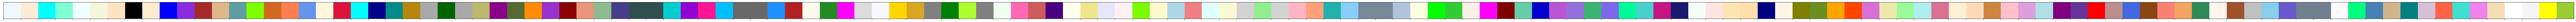

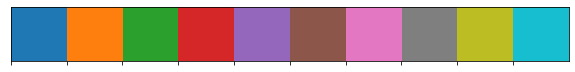

In [339]:
import matplotlib.colors as mcolors
sns.palplot(mcolors.CSS4_COLORS)
sns.palplot(mcolors.TABLEAU_COLORS)

In [340]:
#colors will start from black
colors = list(mcolors.CSS4_COLORS)
colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [341]:
info['color'] = ""

for i in range(info.index.size):
    info['color'][i] = colors[i + 7]
    
info

<ipython-input-341-a0fba849c52a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['color'][i] = colors[i + 7]


,name,articles,tot_reactions,tot_comments,tot_shares,color
id,,,,,,
reuters,Reuters,1252,16963,7101,647095,black
the-irish-times,The Irish Times,1116,26838,10514,6947,blanchedalmond
al-jazeera-english,Al Jazeera English,499,140410,46005,36031,blue
bbc-news,BBC News,1242,545396,207558,200636,blueviolet
abc-news,ABC News,1139,343779,102708,82662,brown
the-new-york-times,The New York Times,983,789908,215853,241348,burlywood
cnn,CNN,1132,1218206,344894,327778,cadetblue
cbs-news,CBS News,952,459741,170960,108155,chartreuse
newsweek,Newsweek,539,93167,32426,29067,chocolate


In [342]:
def plot(figure, title, data_dict):
    ax = figure.add_subplot(111)
    ax.set_xlabel('ora')
    ax.set_ylabel('interazioni')
    ax.set_title(title)

    for key, item in data_dict.items():
        color = 'blue'
        name = ''
        if (key in info.index):
            color = info['color'][key] if not (key in info) else 'blue'
            name = info['name'][key] if not (key in info) else ''
        ax.scatter(item.index, item.values, c = color, label = name)

    plt.legend(loc='upper left');

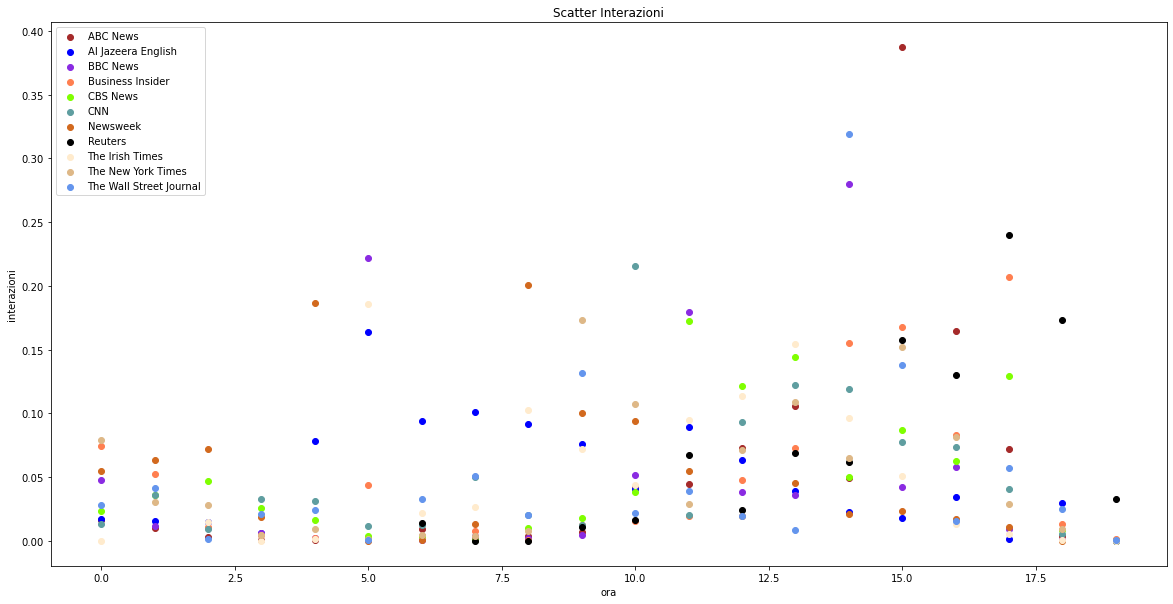

In [343]:
   #Creating a figure with one axes for each news source. 
nsources = info.index.size
fig = plt.figure(figsize=(20, 10.0), facecolor='w') 

plot(fig, 'Scatter Interazioni', hourly_data)

In [344]:
#plotting cumulative graph

No handles with labels found to put in legend.


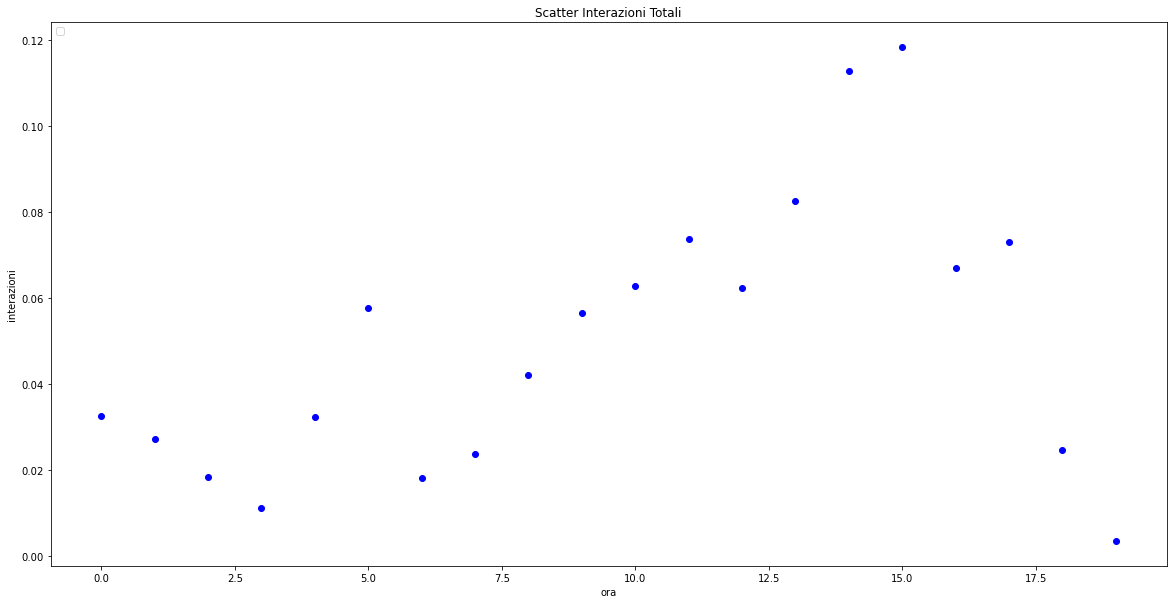

In [345]:
fig2 = plt.figure(figsize=(20, 10.0), facecolor='w') 
temp = {'interazioni totali' : hourly_data_tot}
plot(fig2, 'Scatter Interazioni Totali', temp)

## Replotting without foreign source

In [346]:
hourly_data_local = hourly_data
del hourly_data_local['the-irish-times']
del hourly_data_local['al-jazeera-english']

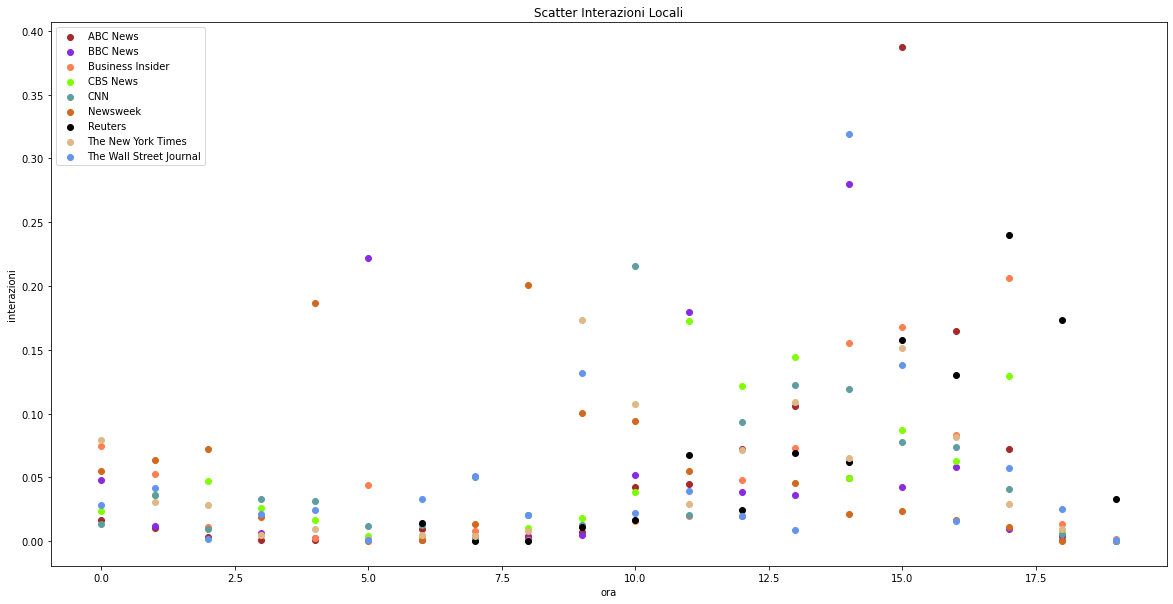

In [347]:
fig3 = plt.figure(figsize=(20, 10.0), facecolor='w') 

plot(fig3, 'Scatter Interazioni Locali', hourly_data)

## Saving

In [348]:
info.to_csv('datasets/info2.csv')

In [349]:
fig.savefig('img/scatter_interazioni.jpg', bbox_inches='tight', dpi=300)
fig2.savefig('img/scatter_interazioni_totali.jpg', bbox_inches='tight', dpi=300)
fig3.savefig('img/scatter_interazioni_locali.jpg', bbox_inches='tight', dpi=300)

In [350]:
for key, item in hourly_data.items():
    item.to_csv('datasets/scatter/' + str(key) + '.csv')

In [351]:
for key, item in grouped_data.items():
    print(item.)

SyntaxError: invalid syntax (<ipython-input-351-090e94d8abb0>, line 2)